# Taller 3: Segmentación

## Cargue la imagen de trabajo objects.png  y visualícela.

In [2]:
# Modificar ruta de las imágenes
PATH = './imagenes/'

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
imagen_objects = cv2.imread(PATH + 'OBJECTS.png', cv2.IMREAD_GRAYSCALE)

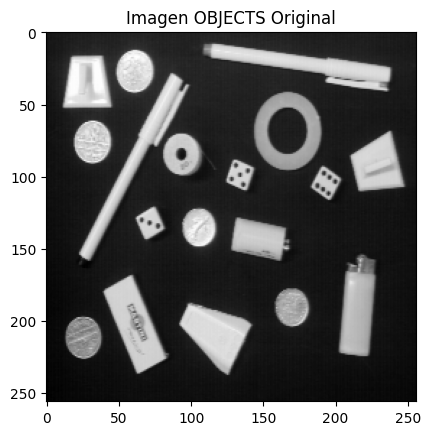

In [5]:
plt.imshow(imagen_objects, cmap='gray')
plt.title('Imagen OBJECTS Original')
plt.show()

## Visualice el histograma de la imagen de trabajo.

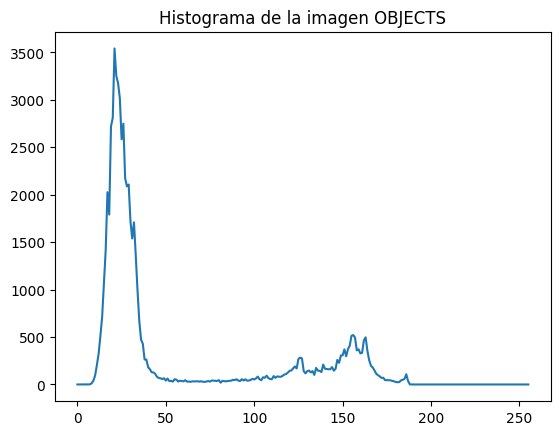

In [6]:
histogram = cv2.calcHist([imagen_objects], [0], None, [256], [0, 256])
plt.plot(histogram)
plt.title('Histograma de la imagen OBJECTS')
plt.show()

## Aplique el algoritmo de umbralización global.

In [7]:
import cv2

thres_value, thres_image = cv2.threshold(imagen_objects, 127, 255, cv2.THRESH_BINARY)

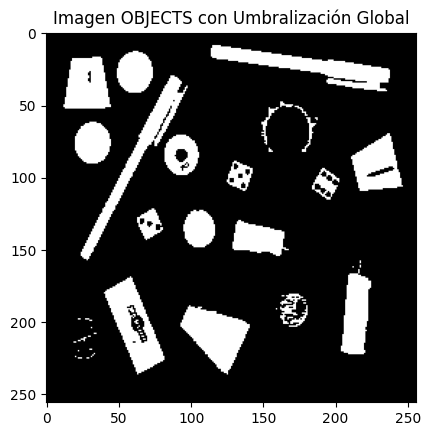

In [8]:
plt.imshow(thres_image, cmap='gray')
plt.title('Imagen OBJECTS con Umbralización Global')
plt.show()

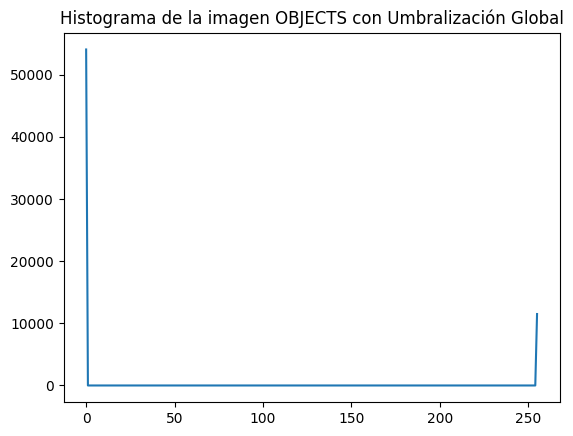

In [9]:
histogram_thres = cv2.calcHist([thres_image], [0], None, [256], [0, 256])
plt.plot(histogram_thres)
plt.title('Histograma de la imagen OBJECTS con Umbralización Global')
plt.show()

Escogimos el valor medio (127) para la umbralización global. Podemos ver como se segmentan correctamente algunos de los objetos en la imagen, pero otros pierden su forma debido a que tienen tonos de grises inferiores al valor de intensidad 127.

## Aplique el algoritmo de umbralización de Otsu con un solo valor.

In [10]:
thres_value_otsu, thres_image_otsu = cv2.threshold(imagen_objects, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [11]:
print(f'Valor de umbralización óptimo (Otsu): {thres_value_otsu}')

Valor de umbralización óptimo (Otsu): 84.0


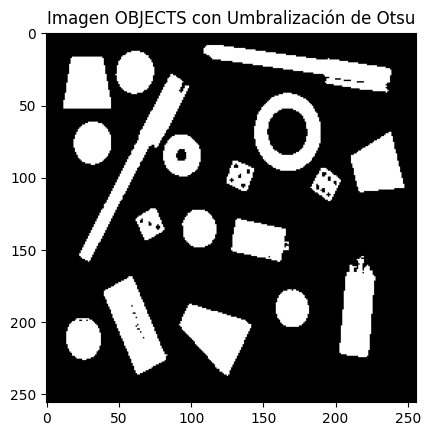

In [12]:
plt.imshow(thres_image_otsu, cmap='gray')
plt.title('Imagen OBJECTS con Umbralización de Otsu')
plt.show()

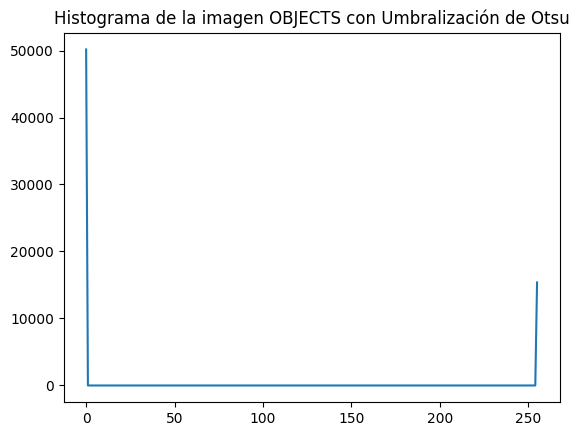

In [13]:
hist_ostsu = cv2.calcHist([thres_image_otsu], [0], None, [256], [0, 256])
plt.plot(hist_ostsu)
plt.title('Histograma de la imagen OBJECTS con Umbralización de Otsu')
plt.show()

Vemos que ahora los objetos segmentados se ven completos gracias a la umbralización de Otsu. El algoritmo escoge un umbral de 84.

## Ahora introduzca ruido gaussiano aditivo con varianza de 0.001 y luego con varianza de 0.05. Visualice el histograma de la imagen resultante. ¿Qué sucede? ¿Por qué sucede esto?

In [14]:

from skimage.util import random_noise

noised_image_0001 = random_noise(imagen_objects, mode='gaussian', mean=0,  var=0.001)
noised_image_005 = random_noise(imagen_objects, mode='gaussian', mean=0,  var=0.05)


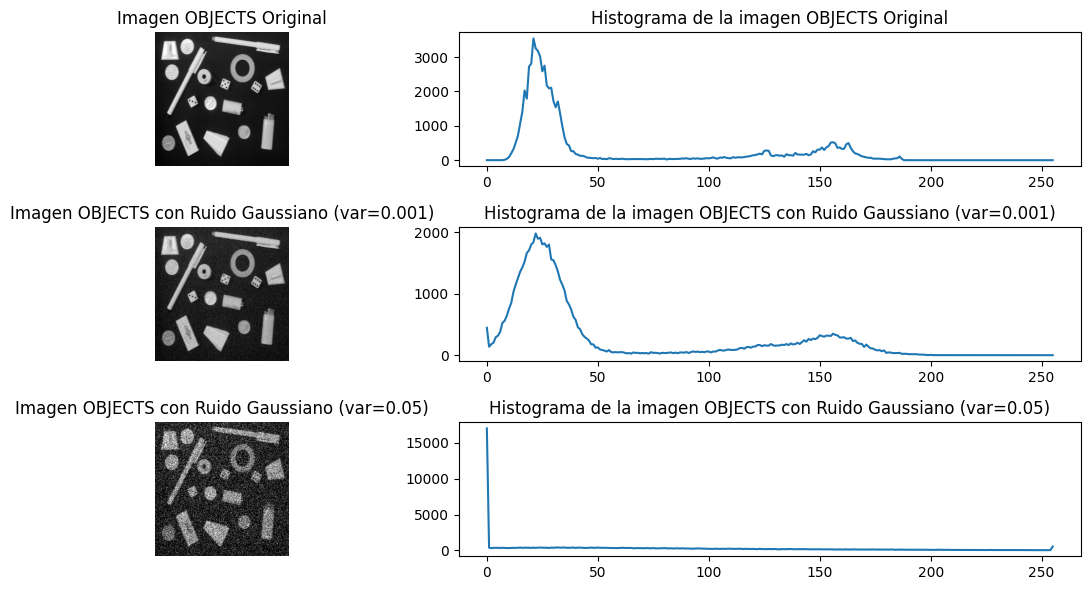

In [15]:
# Convertir imágenes ruidosas a uint8 para histograma
noised_0001_uint8 = (np.clip(noised_image_0001, 0, 1) * 255).astype(np.uint8)
noised_005_uint8 = (np.clip(noised_image_005, 0, 1) * 255).astype(np.uint8)

fig, axs = plt.subplots(3, 2, figsize=(12, 6))
axs[0, 0].imshow(imagen_objects, cmap='gray')
axs[0, 0].set_title('Imagen OBJECTS Original')
axs[0, 0].axis('off')
axs[1, 0].imshow(noised_0001_uint8, cmap='gray')
axs[1, 0].set_title('Imagen OBJECTS con Ruido Gaussiano (var=0.001)')
axs[1, 0].axis('off')
axs[2, 0].imshow(noised_005_uint8, cmap='gray')
axs[2, 0].set_title('Imagen OBJECTS con Ruido Gaussiano (var=0.05)')
axs[2, 0].axis('off')
axs[0, 1].plot(histogram)
axs[0, 1].set_title('Histograma de la imagen OBJECTS Original')
axs[1, 1].plot(cv2.calcHist([noised_0001_uint8], [0], None, [256], [0, 256]))
axs[1, 1].set_title('Histograma de la imagen OBJECTS con Ruido Gaussiano (var=0.001)')
axs[2, 1].plot(cv2.calcHist([noised_005_uint8], [0], None, [256], [0, 256]))
axs[2, 1].set_title('Histograma de la imagen OBJECTS con Ruido Gaussiano (var=0.05)')
plt.tight_layout()
plt.show()

Con el ruido gaussiano con varianza de 0.001 se ve un histograma con forma y picos similares pero más suavizado por la varianza de agregada a los tonos de grises. Con la varianza de 0.05 hay que hacer clipping para que los valores queden en el rango de 0 a 255. Al hacerlo, se crea un artefacto que es el pico en valores de 0 y un pico muy pequeño en 255. Esta saturación hace que se pierdan detalles de la imagen.

## Vuelva a correr las umbralizaciones sobre la imagen ¿Cómo afecta el ruido al resultado?

Iniciamos visualizando la umbralización con valor fijo de 127.

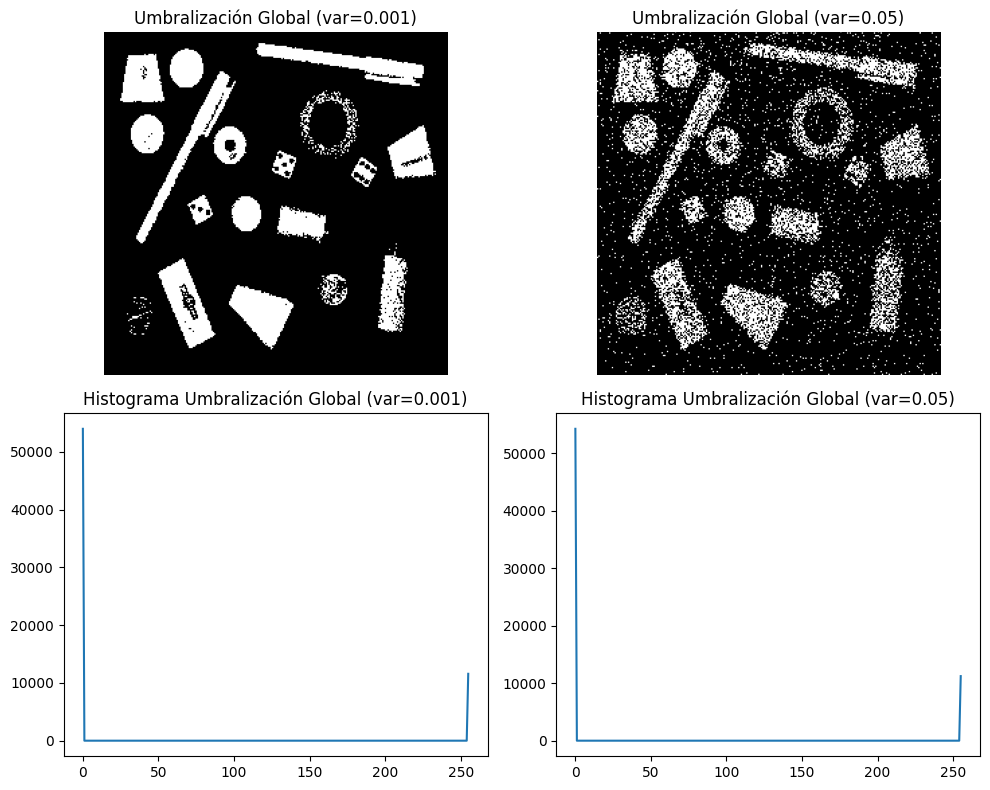

In [16]:
import cv2

thres_noised_0001_uint8, thres_image_noised_0001_uint8 = cv2.threshold(noised_0001_uint8, 127, 255, cv2.THRESH_BINARY)
thres_noised_005_uint8, thres_image_noised_005_uint8 = cv2.threshold(noised_005_uint8, 127, 255, cv2.THRESH_BINARY)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(thres_image_noised_0001_uint8, cmap='gray')
axs[0, 0].set_title('Umbralización Global (var=0.001)')
axs[0, 0].axis('off')
axs[0, 1].imshow(thres_image_noised_005_uint8, cmap='gray')
axs[0, 1].set_title('Umbralización Global (var=0.05)')
axs[0, 1].axis('off')
axs[1, 0].plot(cv2.calcHist([thres_image_noised_0001_uint8], [0], None, [256], [0, 256]))
axs[1, 0].set_title('Histograma Umbralización Global (var=0.001)')
axs[1, 1].plot(cv2.calcHist([thres_image_noised_005_uint8], [0], None, [256], [0, 256]))
axs[1, 1].set_title('Histograma Umbralización Global (var=0.05)')
plt.tight_layout()
plt.show()

Para la umbralización con el valor medio de 127, se observa un comportamiento similar al de la imagen original en el caso del ruido con varianza 0.001: algunos objetos se segmentan correctamente, mientras que otros pierden su forma. Además, se aprecian artefactos en forma de puntos negros sobre los objetos segmentados, producto del ruido que altera localmente los valores de intensidad por debajo del umbral.

En la imagen con ruido de varianza 0.05, el deterioro es mayor. Aparecen artefactos en forma de puntos blancos dentro del fondo de la imagen, y la segmentación de los objetos se pierde considerablemente. La distinción entre las regiones de interés y el fondo se pierde casi por completo.

Repetimos el ejercicio con umbralización Otsu.

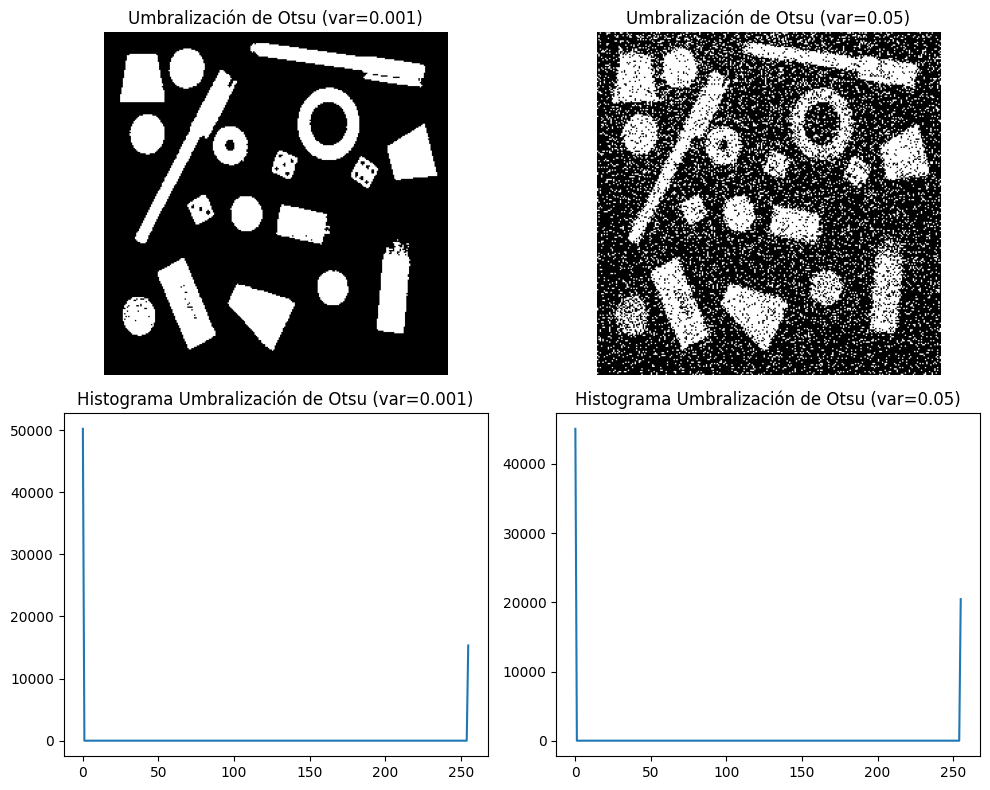

In [17]:
import cv2
### aplicar umbralizaicon ostu a las imágenes ruidosas
thres_noised_0001_otsu, thres_image_noised_0001_otsu = cv2.threshold(noised_0001_uint8, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thres_noised_005_otsu, thres_image_noised_005_otsu = cv2.threshold(noised_005_uint8, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(thres_image_noised_0001_otsu, cmap='gray')
axs[0, 0].set_title('Umbralización de Otsu (var=0.001)')
axs[0, 0].axis('off')
axs[0, 1].imshow(thres_image_noised_005_otsu, cmap='gray')
axs[0, 1].set_title('Umbralización de Otsu (var=0.05)')
axs[0, 1].axis('off')
axs[1, 0].plot(cv2.calcHist([thres_image_noised_0001_otsu], [0], None, [256], [0, 256]))
axs[1, 0].set_title('Histograma Umbralización de Otsu (var=0.001)')
axs[1, 1].plot(cv2.calcHist([thres_image_noised_005_otsu], [0], None, [256], [0, 256]))
axs[1, 1].set_title('Histograma Umbralización de Otsu (var=0.05)')
plt.tight_layout()
plt.show()

In [18]:
print(f'Valor de umbralización óptimo para var=0.001 (Otsu): {thres_noised_0001_otsu}')
print(f'Valor de umbralización óptimo para var=0.05 (Otsu): {thres_noised_005_otsu}')

Valor de umbralización óptimo para var=0.001 (Otsu): 84.0
Valor de umbralización óptimo para var=0.05 (Otsu): 84.0


Para la umbralización de Otsu con ruido de varianza 0.001, el resultado es similar al obtenido con la imagen original: los objetos se segmentan correctamente y conservan su forma. El algoritmo de Otsu logra encontrar un umbral adecuado a pesar del ruido leve, lo que demuestra su robustez frente a perturbaciones pequeñas.

En la imagen con ruido de varianza 0.05, el resultado se degrada significativamente. Aparecen artefactos en forma de puntos blancos dispersos por todo el fondo, y los bordes de los objetos se pierden. El algoritmo de Otsu, al buscar el umbral que maximiza la varianza entre clases, se ve afectado por la distribución alterada del histograma. Como resultado, la separación entre fondo y objetos pierde precisión, evidenciando que niveles altos de ruido gaussiano comprometen incluso métodos robustos como Otsu.

## Cargue ahora la imagen de trabajo text, visualícela y visualice su histograma.

In [20]:
imagen_text = cv2.imread(PATH + 'Text.png', cv2.IMREAD_GRAYSCALE)

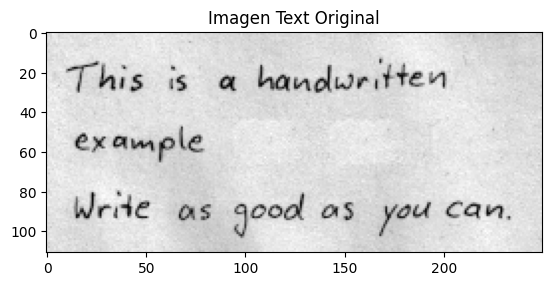

In [21]:
plt.imshow(imagen_text, cmap='gray')
plt.title('Imagen Text Original')
plt.show()

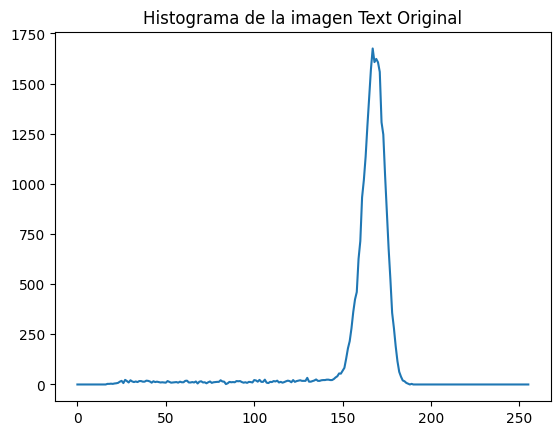

In [22]:
plt.plot(cv2.calcHist([imagen_text], [0], None, [256], [0, 256]))
plt.title('Histograma de la imagen Text Original')
plt.show()

Vemos un pico de grises alrededor de 150 hasta 190. Esto corresponde a las letras en la imagen.

## Introduzca ahora una sombra circular lateral y una sombra sinusoidal en la imagen (pruebe con diferentes valores y úselos para los pasos 10 y 11). Visualice el resultado.

Definimos un par de funciones que nos permiten añadir las sombras:

- **Sombra circular:** Simula una iluminación no uniforme como si una fuente de luz estuviera en el centro de la imagen. Los píxeles cercanos al centro mantienen su brillo, mientras que los alejados se oscurecen gradualmente siguiendo un patrón circular (radial).

- **Sombra sinusoidal:** Simula una iluminación periódica que varía en franjas verticales a lo largo del eje X, como si la luz pasara a través de una persiana. La función seno crea bandas alternantes de mayor y menor brillo.

In [23]:
import numpy as np

def aplicar_sombra_circular(imagen, center_offset=(0, 0)):
    """
    Aplica una sombra circular (viñeta) a la imagen.
    
    Parámetros:
    - imagen: imagen en escala de grises (uint8)
    - center_offset: tupla (dx, dy) para desplazar el centro de la luz.
                     (0,0) = centro de la imagen.
                     Valores negativos mueven la luz hacia la izquierda/arriba.
                     Ej: (-cols//4, 0) = sombra lateral desde la izquierda.
    """
    rows, cols = imagen.shape
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    
    # Centro de la luz (desplazable)
    cx = cols // 2 + center_offset[0]
    cy = rows // 2 + center_offset[1]
    
    # Distancia de cada píxel al centro de luz
    distance = np.sqrt((x - cx) ** 2 + (y - cy) ** 2)
    max_dist = np.sqrt(cx**2 + cy**2)
    
    # Factor de sombreado: 1 en el centro, 0 en el borde
    spot_shading = np.clip(1 - (distance / max_dist), 0, 1)
    
    # Aplicar sombra
    spot_image = imagen * spot_shading
    spot_image = np.clip(spot_image, 0, 255).astype(np.uint8)
    
    return spot_image


def aplicar_sombra_sinusoidal(imagen, frequency=50, amplitude=0.5):
    """
    Aplica una sombra sinusoidal (franjas verticales) a la imagen.
    
    Parámetros:
    - imagen: imagen en escala de grises (uint8)
    - frequency: cantidad de ciclos de la onda seno a lo largo del eje X.
                 Más alto = franjas más estrechas y frecuentes.
    - amplitude: intensidad de la variación (0 a 1).
                 0 = sin efecto, 1 = variación máxima (oscila entre 0 y ~1.33).
    """
    rows, cols = imagen.shape
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    
    # Factor sinusoidal: oscila alrededor de 1/1.5 ≈ 0.67
    # Rango: (1 - amplitude)/1.5  a  (1 + amplitude)/1.5
    sinusoidal_shading = (1 + amplitude * np.sin(2 * np.pi * x / frequency)) / 1.5
    
    # Aplicar sombra
    sinusoidal_image = imagen * sinusoidal_shading
    sinusoidal_image = np.clip(sinusoidal_image, 0, 255).astype(np.uint8)
    
    return sinusoidal_image

Utilizamos las funciones sobre la imagen text con los parámetros por defecto.

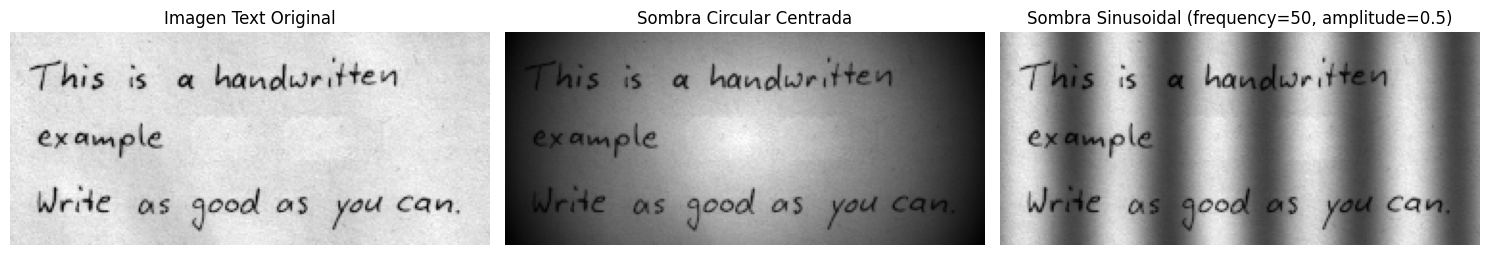

In [ ]:
shadow_circular_center = aplicar_sombra_circular(imagen_text)
shadow_sinusoidal = aplicar_sombra_sinusoidal(imagen_text)

fig, axs = plt.subplots(1, 3, figsize=(15, 8))
axs[0].imshow(imagen_text, cmap='gray')
axs[0].set_title('Imagen Text Original')
axs[0].axis('off')
axs[1].imshow(shadow_circular_center, cmap='gray')
axs[1].set_title('Sombra Circular Centrada')
axs[1].axis('off')
axs[2].imshow(shadow_sinusoidal, cmap='gray')
axs[2].set_title('Sombra Sinusoidal (frequency=50, amplitude=0.5)')
axs[2].axis('off')
plt.tight_layout()
plt.show()

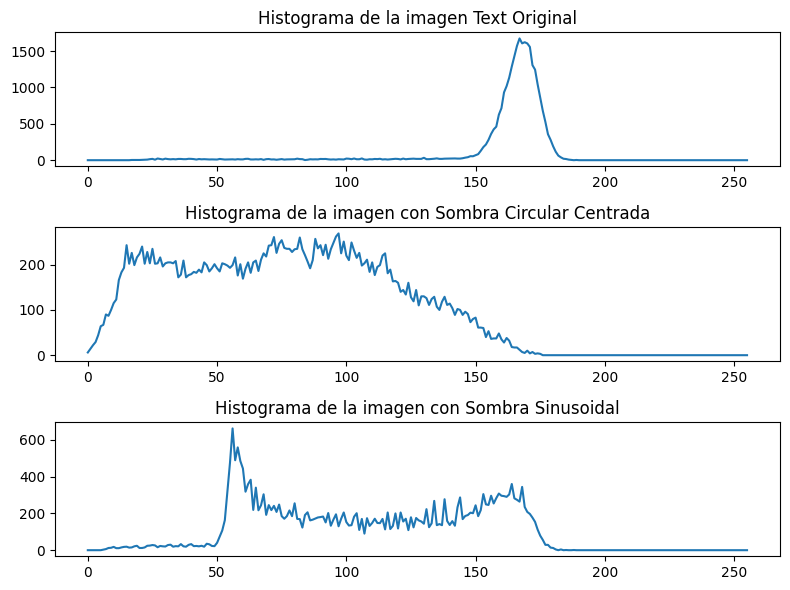

In [30]:
fig, axs = plt.subplots(3, 1, figsize=(8, 6))
axs[0].plot(cv2.calcHist([imagen_text], [0], None, [256], [0, 256]))
axs[0].set_title('Histograma de la imagen Text Original')
axs[1].plot(cv2.calcHist([shadow_circular_center], [0], None, [256], [0, 256]))
axs[1].set_title('Histograma de la imagen con Sombra Circular Centrada')
axs[2].plot(cv2.calcHist([shadow_sinusoidal], [0], None, [256], [0, 256]))
axs[2].set_title('Histograma de la imagen con Sombra Sinusoidal')
plt.tight_layout()
plt.show()

El histograma se ve totalmente afectado por la aplicación de las sombras. Los artefactos generados se pueden ver como intensidades de grises oscuros en el histograma.

## Aplique el algoritmo de umbralización de Otsu sobre la imagen original y las dos modificaciones. ¿Qué sucede? ¿Por qué sucede esto? ¿Qué alternativas puede emplear para mitigar este resultado?

In [32]:
thres_text, thres_image_text = cv2.threshold(imagen_text, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thres_shadow_circular, thres_image_shadow_circular = cv2.threshold(shadow_circular_center, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thres_shadow_sinusoidal, thres_image_shadow_sinusoidal = cv2.threshold(shadow_sinusoidal, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

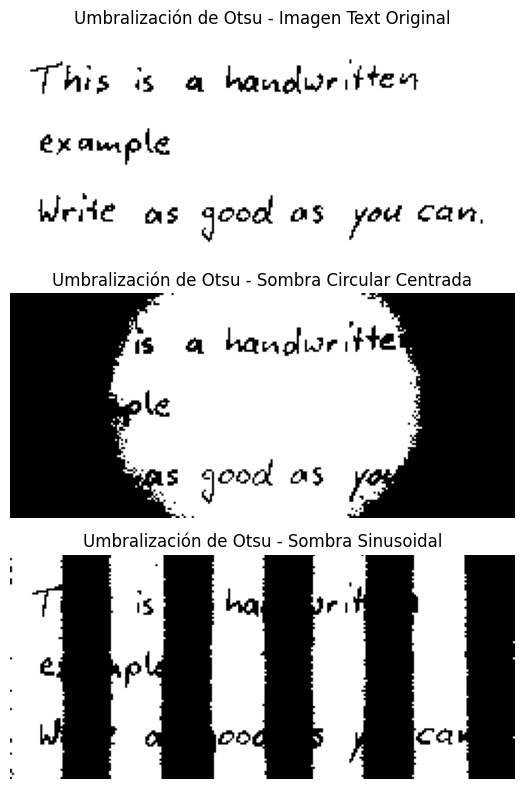

In [34]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].imshow(thres_image_text, cmap='gray')
axs[0].set_title('Umbralización de Otsu - Imagen Text Original')
axs[0].axis('off')
axs[1].imshow(thres_image_shadow_circular, cmap='gray')
axs[1].set_title('Umbralización de Otsu - Sombra Circular Centrada')
axs[1].axis('off')
axs[2].imshow(thres_image_shadow_sinusoidal, cmap='gray')
axs[2].set_title('Umbralización de Otsu - Sombra Sinusoidal')
axs[2].axis('off')
plt.tight_layout()
plt.show()

La umbralización de Otsu sobre la imagen original segmenta correctamente el texto del fondo, separando las letras de manera clara y legible.

En la imagen con sombra circular, Otsu selecciona un único umbral global que no logra adaptarse a la variación de iluminación. En el círculo de sombra cercano al centro, donde hay mejor iluminación, se logra distinguir las letras. En cambio, lejos del circulo del centro se pierden totalmente y queda en negro la figura.

En la imagen con sombra sinusoidal, se observan franjas verticales negras alternadas con franjas donde el texto es parcialmente visible. El umbral global de Otsu clasifica las zonas oscurecidas por la sombra como fondo (negro), perdiendo el texto en esas regiones.

Para mitigar estos resultados, se pueden emplear las siguientes alternativas:

1. **Umbralización adaptativa**: En lugar de un umbral global, se calcula un umbral local para cada región de la imagen, lo que permite adaptarse a variaciones de iluminación.
2. **Corrección de iluminación**: Estimar y compensar la sombra antes de umbralizar, por ejemplo, aplicando un filtro.